# Fussing about

In [17]:
# imports
import numpy as np
import sklearn
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor

from matplotlib import pyplot as plt

# Generate a 2D field

In [4]:
def sin_field(x, y, xp=np.pi, yp=np.pi/2):
    f_xy = np.sin(x/xp) * np.sin(y/yp)
    return f_xy

## Example

In [7]:
xv = np.linspace(0., 2*np.pi, 100)
yv = np.linspace(0., 2*np.pi, 100)
# Grid
xgrid = np.outer(xv, np.ones_like(yv))
ygrid = np.outer(np.ones_like(xv), yv)

In [8]:
f_ex = sin_field(xgrid, ygrid)

### Plot

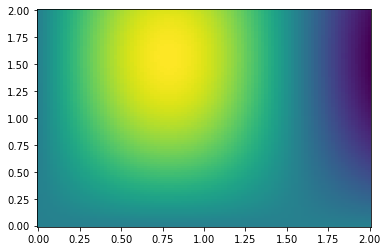

In [11]:
plt.clf()
plt.pcolormesh(xv/np.pi, yv/np.pi, f_ex)
#
plt.show()

<Figure size 432x288 with 0 Axes>

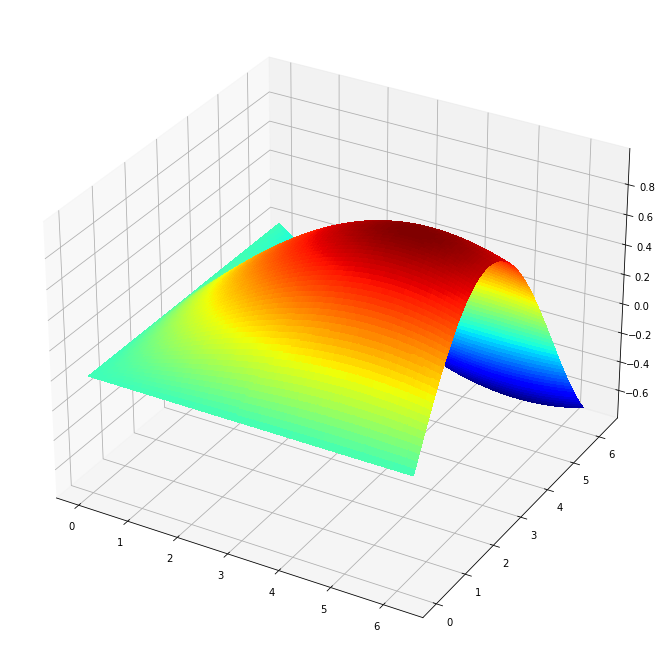

In [70]:
plt.clf()
#ax = plt.gca()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')            
surf = ax.plot_surface(xgrid, ygrid, f_ex, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

# Fit me

## Kernel

In [48]:
kconstant =  ConstantKernel(constant_value=1.0, constant_value_bounds=(0.01, 10.0)) 
kRBF_x = RBF(length_scale=1, length_scale_bounds=(0.1, 20*np.pi)) 
kRBF_y = RBF(length_scale=1, length_scale_bounds=(0.1, 20*np.pi)) 

In [94]:
kRBF_2D = RBF(length_scale=[1,1], length_scale_bounds=[(0.1, 20*np.pi), (0.1, 20*np.pi)]) 

In [51]:
kRBF_x.hyperparameters

[Hyperparameter(name='length_scale', value_type='numeric', bounds=array([[ 0.1       , 62.83185307]]), n_elements=1, fixed=False)]

In [97]:
test_kernel = kRBF_x
test_kernel2D = kRBF_2D
total_kernel = kconstant * kRBF_x * kRBF_y

In [53]:
total_kernel.bounds

array([[-4.60517019,  2.30258509],
       [-2.30258509,  4.14046216],
       [-2.30258509,  4.14046216]])

## Prep

### Take random points

In [19]:
ran_idx = np.random.choice(np.arange(xgrid.size), size = 100, replace = False)
ran_idx

array([1831, 2625, 2506, 3231, 4736, 5318, 4397, 2834, 8230, 3829, 1455,
       3450, 9187,  163, 6174, 2912, 9374, 2925, 4325,   69, 4167, 6685,
       8905,  254, 7439, 2640,  238,  718, 4575, 1174, 6170, 3132, 2134,
       1075, 6590,  165, 1135, 9927,  541, 4759, 7856, 8826, 4577, 9806,
       8373,  751, 8676, 3137, 7533,  818, 2560, 4304, 9858, 9214, 9987,
        194, 7070, 2988, 9462, 2822, 5902, 7549,   32,  383, 2418, 2555,
       9091,  362, 5845, 3510, 8390,  875, 7616, 5543,  547, 8824, 7926,
       7084, 4062, 5312, 2339, 4835, 8827, 1780, 4940, 2477, 2819, 5784,
        978, 5385, 8169, 7985, 1765, 5495, 6316, 9195, 2804, 7470, 6429,
       9720])

In [23]:
ran_x = xgrid.flatten()[ran_idx]
ran_y = ygrid.flatten()[ran_idx]
ran_f = f_ex.flatten()[ran_idx]
ran_f

array([ 0.33781239,  0.4246551 ,  0.11615182,  0.57211597,  0.80763344,
        0.58341903, -0.53563626,  0.5255974 ,  0.93292072,  0.63989383,
        0.22192419,  0.57115448, -0.35194383,  0.01134167,  0.14253885,
        0.25769947,  0.14400186,  0.46825572,  0.64658149,  0.        ,
        0.31016368, -0.2804887 ,  0.19549311,  0.03308442,  0.99711274,
        0.50091562,  0.04036768,  0.09370401,  0.08762031,  0.03330487,
        0.29072209,  0.56363875,  0.40366405,  0.02228407, -0.45915484,
        0.00995532,  0.21769891,  0.80658954,  0.10046774,  0.55885192,
        0.77007042,  0.84915451,  0.02404455,  0.2202564 ,  0.18984744,
        0.12437151,  0.06984586,  0.58443566,  0.97043356,  0.10698092,
        0.31807935,  0.1228545 ,  0.65700895,  0.51392771, -0.33183096,
       -0.01232762,  0.3044349 , -0.22240488,  0.56269196,  0.41611224,
        0.07499553,  0.91609821,  0.        , -0.01274126,  0.30986245,
        0.38476853, -0.49446539,  0.0360033 ,  0.89336746,  0.25

### Transform to GP input

In [26]:
y = ran_f
X = np.array( [ [x,y] for x,y in zip(ran_x, ran_y)] )
X.shape

(100, 2)

## Subtract the mean

In [46]:
mean_y = np.mean(y)
norm_y = y - mean_y

## Fit

In [86]:
gp = GaussianProcessRegressor(kernel=total_kernel, n_restarts_optimizer=50)
gp_test = GaussianProcessRegressor(kernel=test_kernel, n_restarts_optimizer=50)

In [87]:
gp_test.fit(X, norm_y)

/home/xavier/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=50)

In [66]:
gp_test

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=50)

## Check

In [71]:
X_grid = np.array( [ [x,y] for x,y in zip(xgrid.flatten(), ygrid.flatten())] )

In [88]:
y_pred, y_std = gp_test.predict(X_grid, return_std=True)

In [89]:
f_pred = mean_y + y_pred.reshape((100,100))#y_pred.shape

<Figure size 432x288 with 0 Axes>

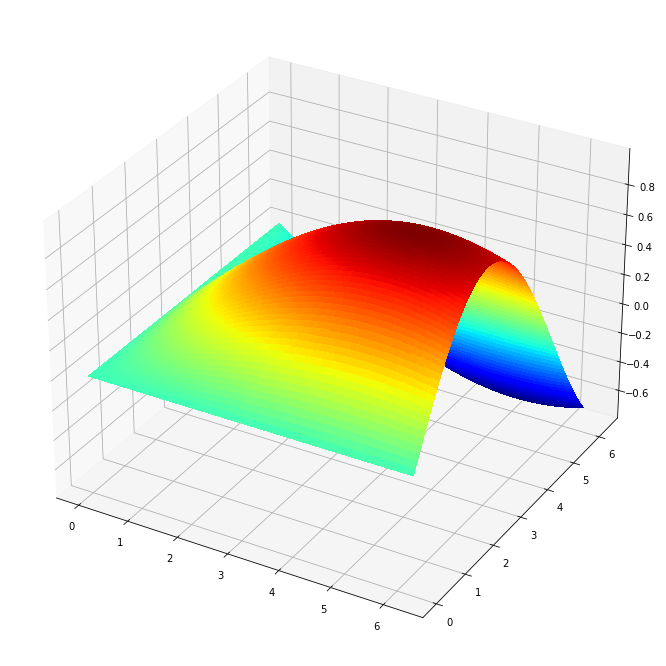

In [90]:
plt.clf()
#ax = plt.gca()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')            
surf = ax.plot_surface(xgrid, ygrid, f_pred, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

## Residuals

<Figure size 432x288 with 0 Axes>

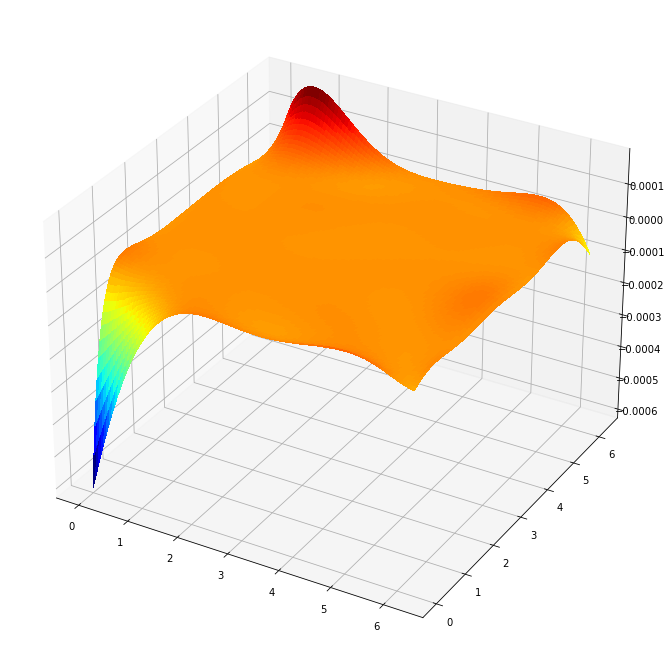

In [91]:
plt.clf()
#ax = plt.gca()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')            
surf = ax.plot_surface(xgrid, ygrid, f_ex-f_pred, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

## Get parameters

In [92]:
gp_test.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__length_scale': 1,
 'kernel__length_scale_bounds': (0.1, 62.83185307179586),
 'kernel': RBF(length_scale=1),
 'n_restarts_optimizer': 50,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [93]:
gp_test.kernel_

RBF(length_scale=4.04)

# 2D Kernel

In [98]:
gp_test2D = GaussianProcessRegressor(kernel=test_kernel2D, n_restarts_optimizer=50)

In [100]:
gp_test2D.fit(X, norm_y)

/home/xavier/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=RBF(length_scale=[1, 1]),
                         n_restarts_optimizer=50)

In [101]:
gp_test2D.kernel_

RBF(length_scale=[6.21, 3.29])

## Check

In [104]:
y_pred2D, y_std = gp_test2D.predict(X_grid, return_std=True)

In [105]:
f_pred2D = mean_y + y_pred2D.reshape((100,100))#y_pred.shape

----

# TESTING

In [30]:
total_kernel.hyperparameters

[Hyperparameter(name='k1__k1__constant_value', value_type='numeric', bounds=array([[ 0., 10.]]), n_elements=1, fixed=False),
 Hyperparameter(name='k1__k2__length_scale', value_type='numeric', bounds=array([[0.        , 6.28318531]]), n_elements=1, fixed=False),
 Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[0.        , 6.28318531]]), n_elements=1, fixed=False)]

In [31]:
total_kernel.bounds

/home/xavier/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


array([[      -inf, 2.30258509],
       [      -inf, 1.83787707],
       [      -inf, 1.83787707]])